<a href="https://colab.research.google.com/github/subhani92/Deep_learning/blob/master/facial_emotions_expession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**imporing libraries**

In [10]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.3.0


In [9]:
!unzip -q '/content/drive/My Drive/deep_learning/786787_1351797_bundle_archive.zip'
!ls

drive  sample_data  test  train


# preprocessing data set:

In [70]:
img_size = 48
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory("/content/train", target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_generator = test_datagen.flow_from_directory("/content/test/", target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Building CNN, Defining model and adding cnn layers

In [11]:
def my_model():
  cnn = tf.keras.models.Sequential(
      tf.keras.layers.Conv2D(64, (5,5), padding ='same', activation='relu', input_shape=(48,48,1)))
      
  '''tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
  cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  cnn.add(tf.keras.layers.Dropout(0.25))
  cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  cnn.add(tf.keras.layers.Dropout(0.25))
  cnn.add(tf.keras.layers.Flatten())
  cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
  cnn.add(tf.keras.layers.Dropout(0.5))
  cnn.add(tf.keras.layers.Dense(7, activation='softmax'))'''
  #tf.keras.layers.Conv2D(64, (5,5), padding ='same', activation='relu', input_shape=(48,48,1)))
  cnn.add(tf.keras.layers.Conv2D(64, (5,5),padding='same', activation='relu'))
  cnn.add(tf.keras.layers.BatchNormalization())

  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

  #,kernel_regularizer = tf.keras.regularizers.l2(0.01)cnn.add(tf.keras.layers.Dropout(0.2))
  cnn.add(tf.keras.layers.Conv2D(128, (5,5),padding='same', activation='relu'))
  cnn.add(tf.keras.layers.Conv2D(128, (5,5),padding='same', activation='relu'))
  cnn.add(tf.keras.layers.BatchNormalization())
  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  
  

  #adding more layers
  cnn.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
  cnn.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
  cnn.add(tf.keras.layers.BatchNormalization())
  cnn.add(tf.keras.layers.Dropout(0.2))
  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))



  cnn.add(tf.keras.layers.Flatten())
  cnn.add(tf.keras.layers.Dense(512))
  #cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  cnn.add(tf.keras.layers.BatchNormalization())
  cnn.add(tf.keras.layers.Activation('relu'))
  cnn.add(tf.keras.layers.Dropout(0.25))
  cnn.add(tf.keras.layers.Dense(7))
  cnn.add(tf.keras.layers.Activation('softmax'))

  return cnn


# compile and fit the model


In [12]:
model = my_model()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
print(train_generator.n)
batch_size = 64
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
print(steps_per_epoch)
print(validation_steps)

28709
448
112


In [ ]:
optm=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)
optm1= tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model.compile(optimizer=optm1,
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_51 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_52 (Batc (None, 24, 24, 128)     

In [61]:
model.metrics_names

['loss', 'accuracy']

# Try Another Model MibileNet

In [25]:
import re
import gc
import glob
import keras
import pandas as pd
import numpy  as np

import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import roc_curve, auc, multilabel_confusion_matrix


import keras.backend as K
from keras.models     import Sequential
from keras.layers     import Dense, Dropout, GlobalMaxPooling2D
from keras.optimizers import Adam, SGD
from keras.applications import MobileNetV2
from keras.callbacks    import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(451)

# General parameters
batch_size = 64
img_size = 48
epochs     = 50



train_generator = ImageDataGenerator(
                    rescale     = 1./255,
                    shear_range = 0.1,
                    zoom_range  = 0.1,
                    width_shift_range  = 0.1,
                    height_shift_range = 0.1,
                    horizontal_flip    = True)

test_generator = ImageDataGenerator(rescale=1./255)



In [ ]:


train_gen = train_generator.flow_from_directory("/content/train",
                                               
                                             target_size=(48,48),
                                             color_mode = 'rgb',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True,
                                              seed=451)

test_gen = test_generator.flow_from_directory("/content/test/", 
                                              target_size=(48,48),
                                             color_mode = 'rgb',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True,
                                              seed=451)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:

model = Sequential()
model.add(MobileNetV2(input_shape=(48,48,3), weights='imagenet', include_top=False))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning:

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 1280)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 2,232,839
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
another_model = model.fit(train_gen,
                steps_per_epoch=28709 // batch_size,
                epochs = 30,
                validation_data=test_gen,
                validation_steps=7178 // batch_size)

Epoch 1/30
448/448 [==============================] - 79s 176ms/step - loss: 0.4761 - accuracy: 0.8355 - val_loss: 0.4184 - val_accuracy: 0.8121
Epoch 2/30
448/448 [==============================] - 55s 124ms/step - loss: 0.3783 - accuracy: 0.8585 - val_loss: 0.5146 - val_accuracy: 0.8258
Epoch 3/30
448/448 [==============================] - 55s 124ms/step - loss: 0.3640 - accuracy: 0.8623 - val_loss: 0.3732 - val_accuracy: 0.8570
Epoch 4/30
448/448 [==============================] - 58s 129ms/step - loss: 0.3495 - accuracy: 0.8667 - val_loss: 0.3357 - val_accuracy: 0.8615
Epoch 5/30
448/448 [==============================] - 58s 130ms/step - loss: 0.3389 - accuracy: 0.8695 - val_loss: 0.3341 - val_accuracy: 0.8647
Epoch 6/30
448/448 [==============================] - 58s 129ms/step - loss: 0.3335 - accuracy: 0.8713 - val_loss: 0.4840 - val_accuracy: 0.8525
Epoch 7/30
448/448 [==============================] - 57s 128ms/step - loss: 0.3259 - accuracy: 0.8729 - val_loss: 0.3814 - val_ac

In [ ]:
model.save_weights('emotion_model_mobilenet2D.h5')
!ls

In [75]:
#compile and fit the model
#cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info=model.fit(train_generator,
        steps_per_epoch=28709 // batch_size,
        epochs = 50,
        batch_size=64,
        verbose=1,
        validation_data = test_generator,
        shuffle=True)

Epoch 1/50
448/448 [==============================] - 37s 82ms/step - loss: 1.4923 - accuracy: 0.4243 - val_loss: 1.4658 - val_accuracy: 0.4607
Epoch 2/50
448/448 [==============================] - 37s 82ms/step - loss: 1.3408 - accuracy: 0.4870 - val_loss: 1.2774 - val_accuracy: 0.5033
Epoch 3/50
448/448 [==============================] - 37s 82ms/step - loss: 1.2544 - accuracy: 0.5242 - val_loss: 1.2014 - val_accuracy: 0.5430
Epoch 4/50
448/448 [==============================] - 37s 83ms/step - loss: 1.1957 - accuracy: 0.5448 - val_loss: 1.2227 - val_accuracy: 0.5340
Epoch 5/50
448/448 [==============================] - 37s 82ms/step - loss: 1.1482 - accuracy: 0.5654 - val_loss: 1.1681 - val_accuracy: 0.5690
Epoch 6/50
448/448 [==============================] - 37s 82ms/step - loss: 1.1141 - accuracy: 0.5788 - val_loss: 1.1996 - val_accuracy: 0.5469
Epoch 7/50
448/448 [==============================] - 37s 82ms/step - loss: 1.0786 - accuracy: 0.5927 - val_loss: 1.1186 - val_accuracy:

In [56]:
model.metrics_names

['loss', 'accuracy']

In [64]:
print(model_info.history)

{'loss': [0.5183096528053284], 'accuracy': [0.8096067309379578], 'val_loss': [1.173994541168213], 'val_accuracy': [0.6472554802894592]}


# Model accuracy loss graph

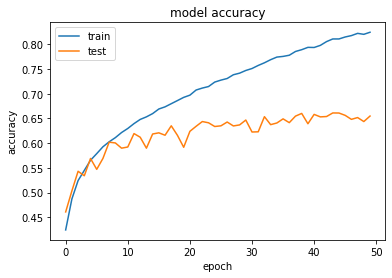

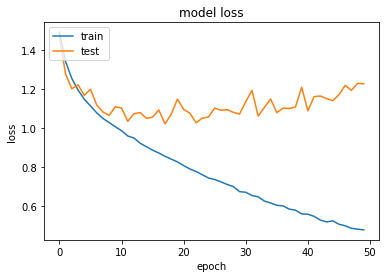

In [76]:
import matplotlib.pyplot as plt
# for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
#save the model weihgt
model.save_weights('my_model.h5')
!ls

drive		  face3.jpg  face7jpg				  test
emotion_model.h5  face4.jpg  haarcascade_frontalface_default.xml  train
face1.jpg	  face5.jpg  my_model.h5
face2.jpg	  face6.jpg  sample_data


In [29]:
model.load_weights('/content/my_model.h5')

In [13]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

[[0. 0. 0. 1. 0. 0. 0.]]
3


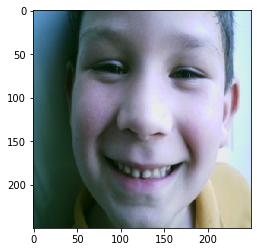

Expression Prediction: happy


In [30]:
import keras
from skimage import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
img = keras.preprocessing.image.load_img(
    "/content/face4.jpg", color_mode='grayscale', target_size=(48,48)
)
show_img = keras.preprocessing.image.load_img(
    "/content/face4.jpg", color_mode='rgba', target_size=(250,250)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
maxindex = int(np.argmax(predictions)) 
print(maxindex)
score = predictions[0]
#print(int(np.argmax(score)))

#emotion_analysis(score)
plt.imshow(show_img)
plt.show()
      
print('Expression Prediction:',emotions[maxindex])
        